In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import lag_plot
from pandas import datetime
from pandas import concat
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

/usr/lib/python3/dist-packages/matplotlib/__init__.py:880: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                                    SHAMPOO SALES DATASET

In [3]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv',na_values=['NA'],parse_dates=[0],squeeze=True)


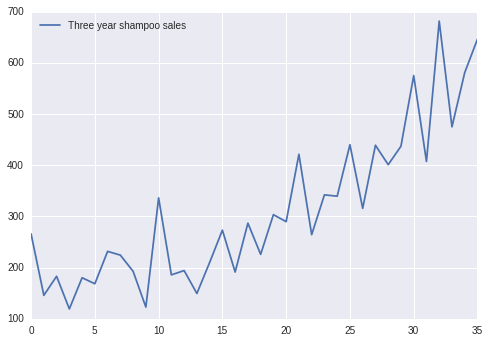

In [4]:
data.plot()
plt.show()

                                  AUTOCORRELATION PLOTS

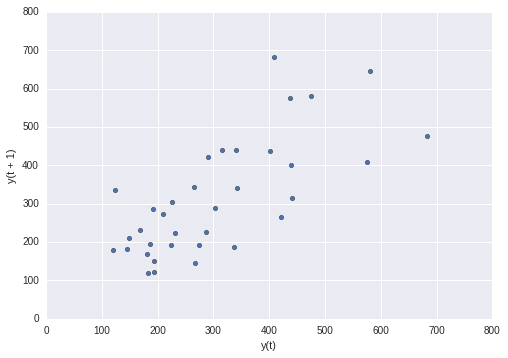

In [5]:
lag_plot(data['Three year shampoo sales'])
plt.show()

In [6]:
for i in range(1,11):
    values = DataFrame(data['Three year shampoo sales'].values)
    dataframe = concat([values.shift(i),values],axis=1)
    result = dataframe.corr()
    print(result)

          0         0
0  1.000000  0.719482
0  0.719482  1.000000
          0         0
0  1.000000  0.850743
0  0.850743  1.000000
          0         0
0  1.000000  0.754949
0  0.754949  1.000000
          0         0
0  1.000000  0.798898
0  0.798898  1.000000
          0         0
0  1.000000  0.797534
0  0.797534  1.000000
          0         0
0  1.000000  0.720113
0  0.720113  1.000000
          0         0
0  1.000000  0.744945
0  0.744945  1.000000
          0         0
0  1.000000  0.663472
0  0.663472  1.000000
          0         0
0  1.000000  0.687762
0  0.687762  1.000000
          0         0
0  1.000000  0.676003
0  0.676003  1.000000


In [7]:
#we can clealy see that the best option for us to choose here is a lag of 2 .
#the autocorrelation plot can be very useful in determining if our dataset is random or not and if the dataset consists of the cycles. 


/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


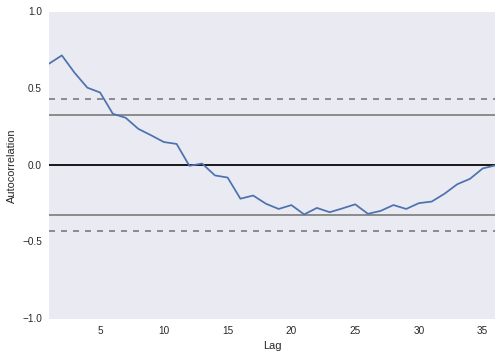

In [8]:
autocorrelation_plot(data['Three year shampoo sales'])
plt.show()

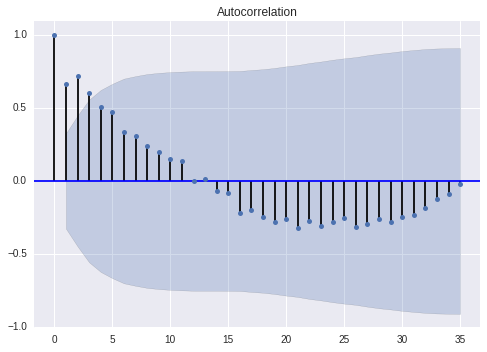

In [9]:
plot_acf(data['Three year shampoo sales'])

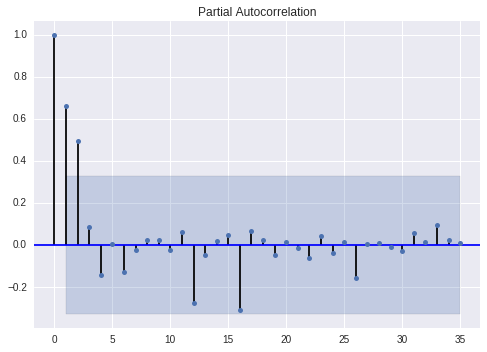

In [10]:
plot_pacf(data['Three year shampoo sales'])
#it also takes into account the intermediate values in between

                               IMPLEMENTATION OF ARIMA MODEL AND TUNING ITS PARAMETERS

In [63]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [64]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2)
train = train.values
test = test.values

In [65]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [66]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -171.089
Method:                       css-mle   S.D. of innovations            129.590
Date:                Fri, 16 Feb 2018   AIC                            356.178
Time:                        02:06:22   BIC                            365.248
Sample:                             1   HQIC                           358.875
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9898      5.817      0.858      0.401      -6.411      16.391
ar.L1.D.y     -1.0081      0.221     -4.563      0.000      -1.441      -0.575
ar.L2.D.y     -0.9533      0.314     -3.036      0.0

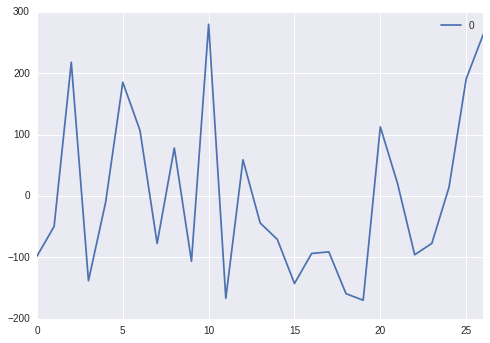

In [67]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

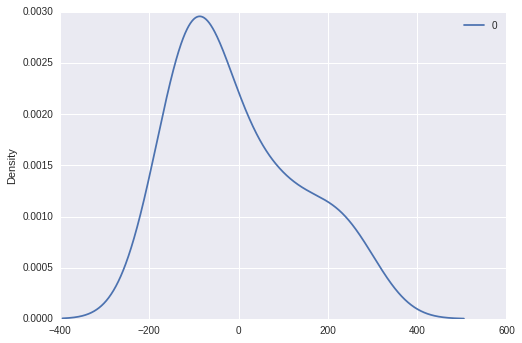

                0
count   27.000000
mean    -2.200832
std    137.290517
min   -169.767437
25%    -96.811407
50%    -49.466309
75%     92.620617
max    279.846563


In [68]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [70]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=246.929907, expected=210.100000
predicted=250.285303, expected=439.300000
predicted=333.762437, expected=122.900000
predicted=513.785962, expected=339.700000
predicted=525.566797, expected=145.900000
predicted=259.700932, expected=264.500000
predicted=311.610714, expected=646.900000
predicted=225.126725, expected=437.400000


In [74]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 51687.580


In [77]:
model = ARIMA(train, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -175.585
Method:                       css-mle   S.D. of innovations            159.613
Date:                Fri, 16 Feb 2018   AIC                            359.169
Time:                        02:07:33   BIC                            364.353
Sample:                             1   HQIC                           360.711
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5056     15.117      0.761      0.454     -18.124      41.135
ar.L1.D.y     -0.7463      0.183     -4.084      0.000      -1.104      -0.388
ar.L2.D.y     -0.3411      0.188     -1.817      0.0

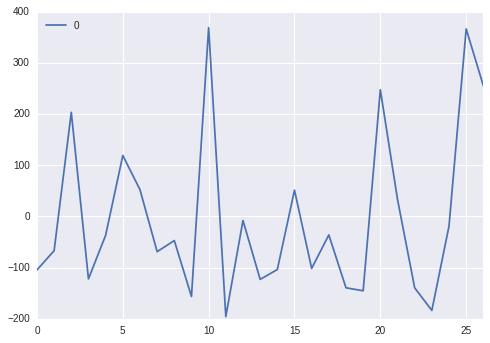

In [78]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

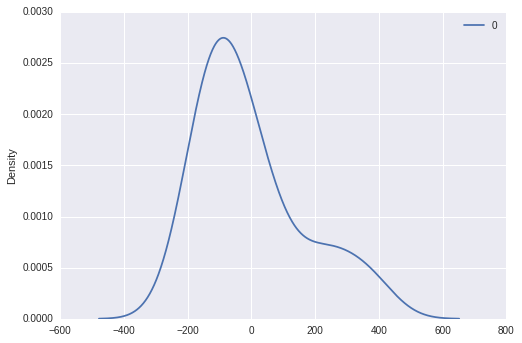

                0
count   27.000000
mean    -3.583969
std    163.177161
min   -195.662723
25%   -122.421010
50%    -47.045536
75%     51.992039
max    369.168576


In [80]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [89]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=482.140853, expected=210.100000
predicted=521.643225, expected=439.300000
predicted=432.149374, expected=122.900000
predicted=290.284623, expected=339.700000
predicted=282.751282, expected=145.900000
predicted=228.587342, expected=264.500000
predicted=232.530855, expected=646.900000
predicted=316.010156, expected=437.400000


In [90]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 48164.870


In [91]:
model = ARIMA(train, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -173.662
Method:                       css-mle   S.D. of innovations            140.796
Date:                Fri, 16 Feb 2018   AIC                            357.323
Time:                        02:09:56   BIC                            363.802
Sample:                             1   HQIC                           359.250
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3772      3.197      0.744      0.465      -3.889       8.643
ar.L1.D.y     -0.0844      0.215     -0.393      0.698      -0.506       0.337
ar.L2.D.y     -0.0286      0.236     -0.121      0.9

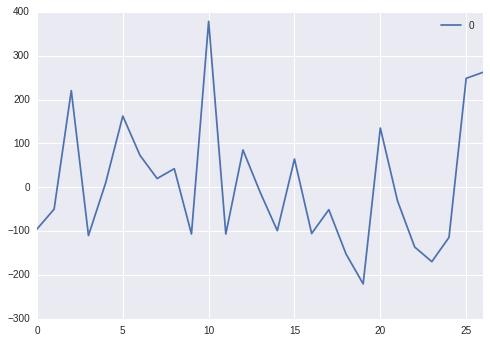

In [92]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

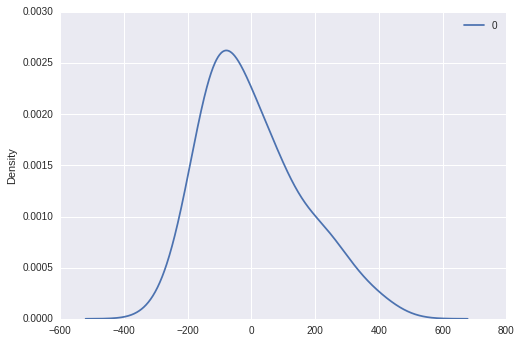

                0
count   27.000000
mean     5.292911
std    150.468817
min   -220.341984
25%   -106.697750
50%    -30.983425
75%     79.013392
max    378.637795


In [93]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [94]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=305.995482, expected=210.100000
predicted=325.152619, expected=439.300000
predicted=333.695980, expected=122.900000
predicted=365.386077, expected=339.700000
predicted=324.563517, expected=145.900000
predicted=338.984902, expected=264.500000
predicted=300.050741, expected=646.900000
predicted=266.764990, expected=437.400000


In [95]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31776.207


In [96]:
model = ARIMA(train, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -171.725
Method:                       css-mle   S.D. of innovations            161.647
Date:                Fri, 16 Feb 2018   AIC                            353.450
Time:                        02:10:21   BIC                            359.741
Sample:                             2   HQIC                           355.262
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3576      2.134      0.636      0.531      -2.826       5.541
ar.L1.D2.y    -0.7221      0.188     -3.851      0.001      -1.090      -0.355
ar.L2.D2.y    -0.3095      0.193     -1.604      0.1

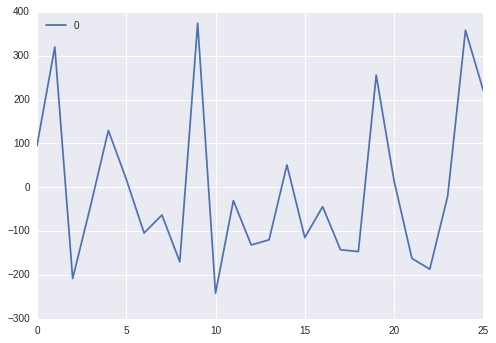

In [97]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

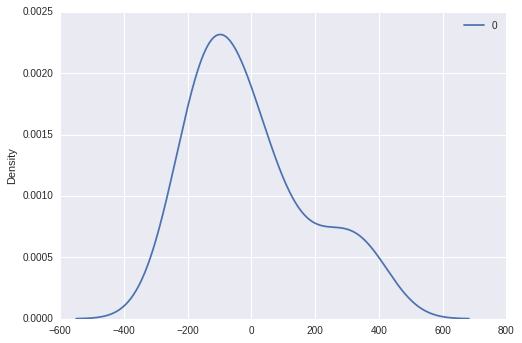

                0
count   26.000000
mean    -3.599087
std    180.202699
min   -241.698355
25%   -139.814850
50%    -43.578731
75%     83.568126
max    374.248152


In [99]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [101]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=521.057106, expected=210.100000
predicted=526.976149, expected=439.300000
predicted=428.332006, expected=122.900000
predicted=263.677338, expected=339.700000
predicted=252.380078, expected=145.900000
predicted=194.470297, expected=264.500000
predicted=198.603182, expected=646.900000
predicted=325.882578, expected=437.400000


In [102]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 54137.240


                                IMPLEMENTATION OF FBPROPHET MODEL AND TUNING ITS PARAMTERS
                                

In [103]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv',na_values=['NA'],parse_dates=[0],squeeze=True)
l =len(data['month'])

In [104]:
for i in range(l):
    data['month'][i] = '190'+data['month'][i]
    data['month'][i] = datetime.strptime(data['month'][i],'%Y-%m')

/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
data['month'] = pd.DatetimeIndex(data['month'])

In [106]:
data = data.rename(columns={'month': 'ds',
                        'Three year shampoo sales': 'y'})

In [107]:
train,test = train_test_split(data,test_size=0.3)

In [135]:
model = Prophet(interval_width=0.90)
model.fit(train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


In [136]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,1902-10-01,300.758196,198.831708,410.058889
11,1903-01-01,491.058263,385.506895,603.899831
12,1903-04-01,525.701306,414.420246,635.603253
13,1903-05-01,458.441784,345.979933,576.114742
14,1903-08-01,488.168282,380.883854,585.267835


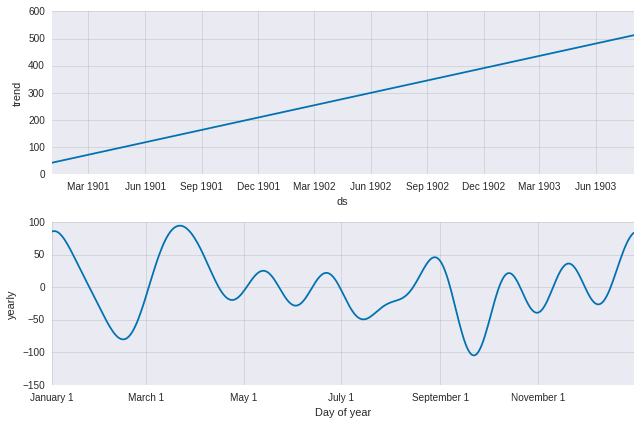

In [137]:
model.plot_components(forecast)

In [138]:
#the blue line here depicts the predicted model, black dots here represent the observed dots and  the shaded region here
# represents the uncertainity intervals of our cast . 


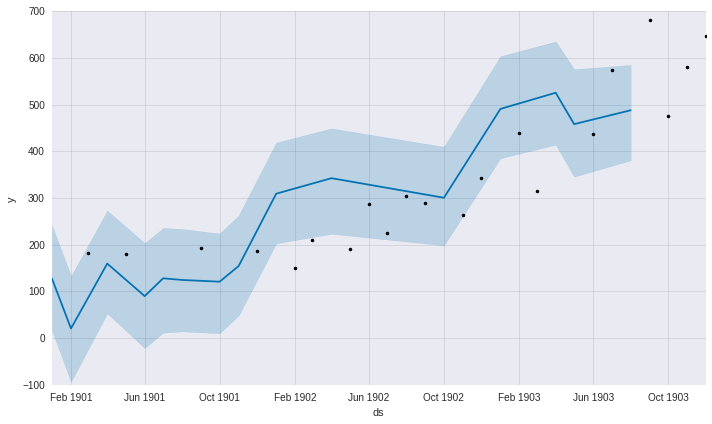

In [139]:
model.plot(forecast)

In [140]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['y'],forecast['yhat'])
print('Test MSE: %.3f' % error)

Test MSE: 47840.644


In [141]:
model = Prophet(interval_width=0.80)
model.fit(train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


In [142]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,1902-10-01,300.758196,219.416965,382.413476
11,1903-01-01,491.058263,408.191301,571.209779
12,1903-04-01,525.701306,444.829901,613.118251
13,1903-05-01,458.441784,378.796325,546.343736
14,1903-08-01,488.168282,400.231766,574.589175


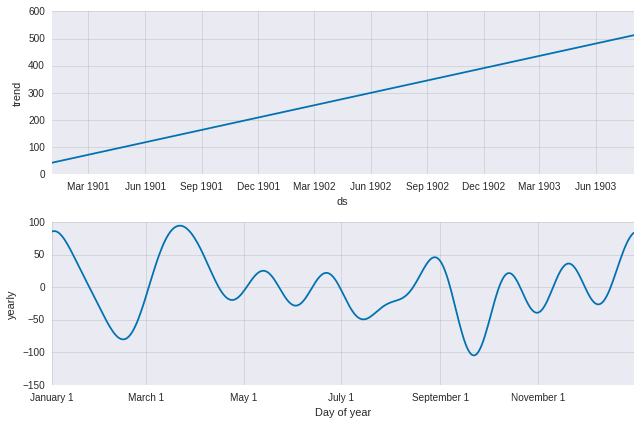

In [116]:
model.plot_components(forecast)

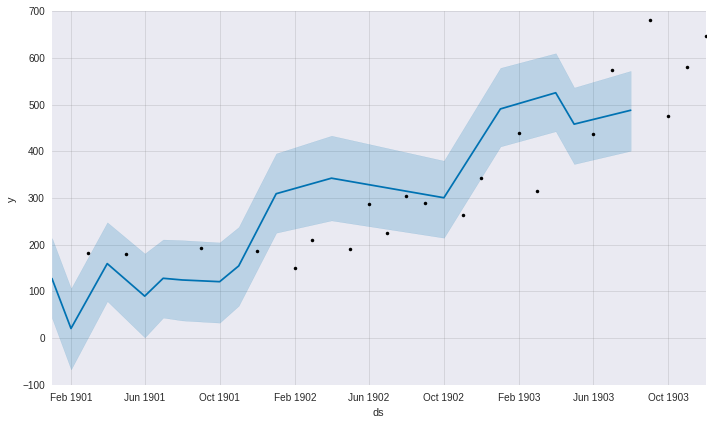

In [117]:
model.plot(forecast)

In [130]:
model = Prophet(interval_width=0.85)
model.fit(train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 15.0.


In [131]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,1902-10-01,300.758196,209.739799,394.570461
11,1903-01-01,491.058263,393.150976,584.287505
12,1903-04-01,525.701306,433.568413,620.873111
13,1903-05-01,458.441784,362.684083,557.572023
14,1903-08-01,488.168282,395.868779,579.649092


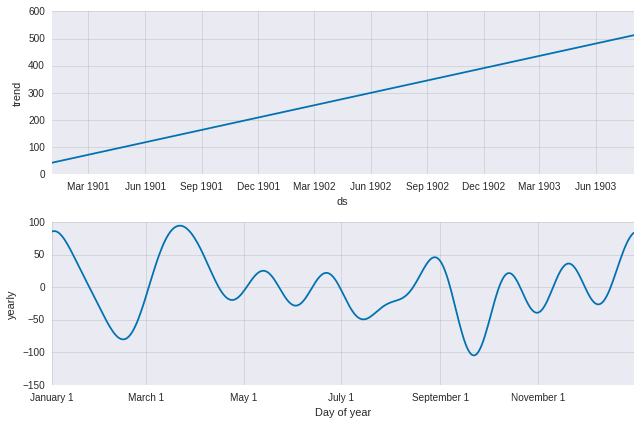

In [132]:
model.plot_components(forecast)

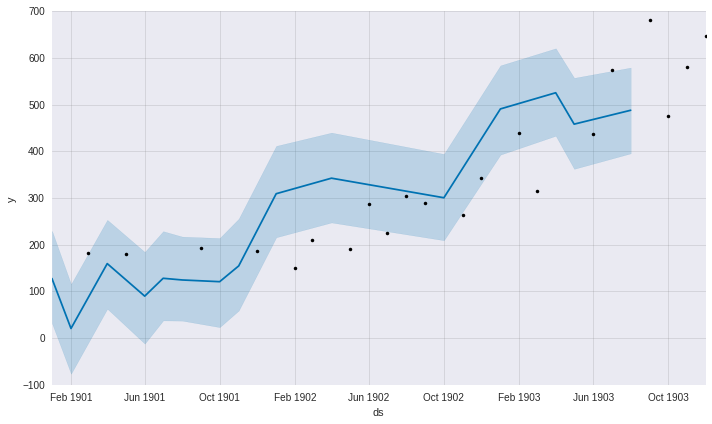

In [133]:
model.plot(forecast)